In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os

In [57]:
file_path = "LevelAnalysis/LevelTwo/SpreadsheetData/Playtest_Level2_11_11_24.csv"

with open(file_path, "r") as file:
    lines = file.readlines()

filtered_lines = [line for line in lines if not (line.startswith("Link to form") or line.strip(",\n") == "")]

# Convert filtered lines to a DataFrame
from io import StringIO
cleaned_csv = StringIO("".join(filtered_lines))
df = pd.read_csv(cleaned_csv)

df.head()

,Timestamp,SessionID,Most Common State,MCS Overall Data,MCS Data / Checkpoint,Respawn Counts,Diamond Collection Data,Heatmap Data
0,11/11/2024 15:37:29,6.386694e+17,STATE_MED,"{""STATE_SMALL"": 11.25968, ""STATE_MED"": 122.971...","{""Start"": {""STATE_SMALL"": 7.519524, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 1, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-17.0,""y"":0...."
1,11/11/2024 15:51:03,6.386690e+17,STATE_MED,"{""STATE_SMALL"": 6.088501, ""STATE_MED"": 78.9815...","{""Start"": {""STATE_SMALL"": 4.113617, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 2, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-15.0,""y"":2...."
2,11/11/2024 15:57:16,6.386690e+17,STATE_MED,"{""STATE_SMALL"": 20.90089, ""STATE_MED"": 130.672...","{""Start"": {""STATE_SMALL"": 5.404799, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
3,11/11/2024 16:33:54,6.386694e+17,STATE_MED,"{""STATE_SMALL"": 24.87566, ""STATE_MED"": 271.563...","{""Start"": {""STATE_SMALL"": 2.817657, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-13.0,""y"":4...."


In [58]:
# Map session id to a row index
df["SessionID"] = df.index
df.head()

,Timestamp,SessionID,Most Common State,MCS Overall Data,MCS Data / Checkpoint,Respawn Counts,Diamond Collection Data,Heatmap Data
0,11/11/2024 15:37:29,0,STATE_MED,"{""STATE_SMALL"": 11.25968, ""STATE_MED"": 122.971...","{""Start"": {""STATE_SMALL"": 7.519524, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 1, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-17.0,""y"":0...."
1,11/11/2024 15:51:03,1,STATE_MED,"{""STATE_SMALL"": 6.088501, ""STATE_MED"": 78.9815...","{""Start"": {""STATE_SMALL"": 4.113617, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 2, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-15.0,""y"":2...."
2,11/11/2024 15:57:16,2,STATE_MED,"{""STATE_SMALL"": 20.90089, ""STATE_MED"": 130.672...","{""Start"": {""STATE_SMALL"": 5.404799, ""STATE_MED...","{""Checkpoint 2"": 0, ""Checkpoint 3"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 2"": 6, ""Checkpoint 3...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
3,11/11/2024 16:33:54,3,STATE_MED,"{""STATE_SMALL"": 24.87566, ""STATE_MED"": 271.563...","{""Start"": {""STATE_SMALL"": 2.817657, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-13.0,""y"":4...."


In [78]:
df.iloc[0]["Diamond Collection Data"]

'{"Start": 25, "Checkpoint 2": 6, "Checkpoint 3": 8, "Checkpoint 4": 10, "Checkpoint 5": 4, "Checkpoint 8": 10, "Checkpoint 9": 17}'

In [59]:
def save_plot(figure, save_path):
    figure.savefig(save_path)
    plt.close(figure)

In [60]:
def plot_mcs_data_overall(datapoint):
   states = list(datapoint.keys())
   fig = plt.figure(figsize=(10, 6))
   time_spent = list(datapoint.values())

   plt.bar(states, time_spent, color='skyblue')
   plt.title("Total Most Common State Data")
   plt.xlabel("State")
   plt.ylabel("Time Spent")
   
   return fig

In [ ]:
datapoint = json.loads(df.iloc[0]["MCS Overall Data"])
graph = plot_mcs_data_overall(data)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/MCSOverallData.png")


In [62]:
def plot_mcs_data_checkpoint(datapoint):
    temp_df = pd.DataFrame(datapoint).T
    fig = plt.figure(figsize=(10, 6))
    sns.heatmap(temp_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Time Spent'})
    plt.title("Time Spent in Different States at Each Checkpoint")
    plt.xlabel("Player State")
    plt.ylabel("Checkpoint")
    return fig


In [63]:
data = json.loads(df.iloc[0]["MCS Data / Checkpoint"])
graph = plot_mcs_data_checkpoint(data)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/MCSDataCheckpoint.png")

In [ ]:
def plot_multi_dictionary(datapoint, graph_type, level):
    checkpoints = list(datapoint.keys())
    fig = plt.figure(figsize=(10, 6))
    counts = list(datapoint.values())

    if graph_type == "respawn":

        plt.bar(checkpoints, counts, color='skyblue')
        plt.title("Respawn Counts at Each Checkpoint")
        plt.xlabel("Checkpoint")
        plt.ylabel("Respawn Count")

    elif graph_type == "diamonds":
        # TODO: Implement this
        if level == 2:
            total_diamonds = 3

        
        plt.bar(checkpoints, counts, color='orange')
        plt.title("Diamond Counts at Each Checkpoint")
        plt.xlabel("Checkpoint")
        plt.ylabel("Diamond Count")

    return fig


In [65]:
data_respawn = json.loads(df.iloc[0]["Respawn Counts"])
graph_respawn = plot_multi_dictionary(data_respawn, "respawn")
save_plot(graph_respawn, "LevelAnalysis/LevelTwo/Insights/Player0/RespawnCounts.png")
data_diamonds = json.loads(df.iloc[0]["Diamond Collection Data"])
graph_diamonds = plot_multi_dictionary(data_diamonds, "diamonds")
save_plot(graph_diamonds, "LevelAnalysis/LevelTwo/Insights/Player0/DiamondCounts.png")

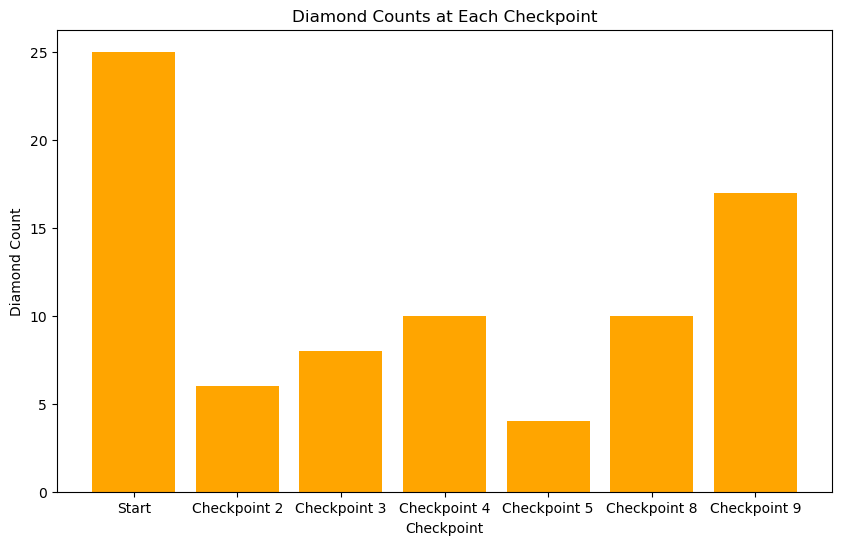

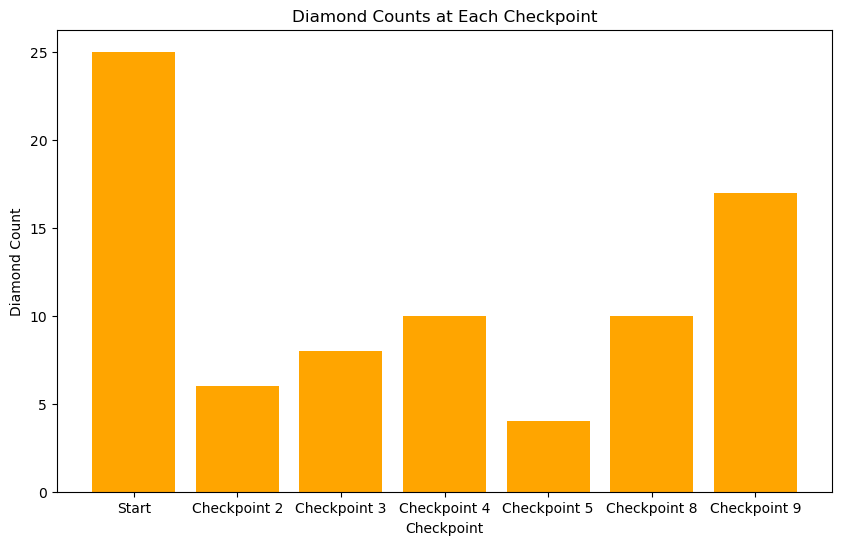

In [66]:
data = json.loads(df.iloc[0]["Diamond Collection Data"])
plot_multi_dictionary(data, "diamonds")

In [72]:
def plot_heatmap_data(datapoint):

   x_coords = [point['x'] for point in datapoint['keys']]
   y_coords = [point['y'] for point in datapoint['keys']]
   values = datapoint['values']

   grid_size = 50
   heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=grid_size, weights=values)
   extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

   fig = plt.figure(figsize=(18, 12))

   # Option 1: Set `vmin` and `vmax` for higher contrast
   plt.subplot(2, 2, 1)
   plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='YlOrRd', vmin=0, vmax=np.percentile(values, 90))
   plt.colorbar(label='Intensity')
   plt.title("Option 1: Adjust `vmin` and `vmax`")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 2: Use a different color map (e.g., 'hot')
   plt.subplot(2, 2, 2)
   plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
   plt.colorbar(label='Intensity')
   plt.title("Option 2: Use 'hot' Color Map")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 3: Scale the weights to increase intensity
   scaled_values = [v * 1.5 for v in values]  # Adjust the multiplier as needed
   heatmap_scaled, _, _ = np.histogram2d(x_coords, y_coords, bins=grid_size, weights=scaled_values)
   plt.subplot(2, 2, 3)
   plt.imshow(heatmap_scaled.T, extent=extent, origin='lower', cmap='YlOrRd')
   plt.colorbar(label='Intensity')
   plt.title("Option 3: Scale Weights")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 4: Apply logarithmic scaling for more detail in a wide range of values
   plt.subplot(2, 2, 4)
   plt.imshow(np.log1p(heatmap.T), extent=extent, origin='lower', cmap='YlOrRd')
   plt.colorbar(label='Intensity')
   plt.title("Option 4: Logarithmic Scaling")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   plt.tight_layout()
   # plt.show()
   return fig


In [74]:
data = json.loads(df.iloc[0]["Heatmap Data"])
graph = plot_heatmap_data(data)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/HeatmapData.png")

In [77]:
for i in range(0, len(df)):
    print(f"Generating insights for player {i}")
    if not os.path.exists(f"LevelAnalysis/LevelTwo/Insights/Player{i}"):
        os.makedirs(f"LevelAnalysis/LevelTwo/Insights/Player{i}")
    
    data = json.loads(df.iloc[i]["MCS Overall Data"])
    graph = plot_mcs_data_overall(data)
    save_plot(graph, f"LevelAnalysis/LevelTwo/Insights/Player{i}/MCSOverallData.png")

    data = json.loads(df.iloc[i]["MCS Data / Checkpoint"])
    graph = plot_mcs_data_checkpoint(data)
    save_plot(graph, f"LevelAnalysis/LevelTwo/Insights/Player{i}/MCSDataCheckpoint.png")

    data_respawn = json.loads(df.iloc[i]["Respawn Counts"])
    graph_respawn = plot_multi_dictionary(data_respawn, "respawn")
    save_plot(graph_respawn, f"LevelAnalysis/LevelTwo/Insights/Player{i}/RespawnCounts.png")

    data_diamonds = json.loads(df.iloc[i]["Diamond Collection Data"])
    graph_diamonds = plot_multi_dictionary(data_diamonds, "diamonds")
    save_plot(graph_diamonds, f"LevelAnalysis/LevelTwo/Insights/Player{i}/DiamondCounts.png")

    data = json.loads(df.iloc[i]["Heatmap Data"])
    graph = plot_heatmap_data(data)
    save_plot(graph, f"LevelAnalysis/LevelTwo/Insights/Player{i}/HeatmapData.png")

Generating insights for player 0
Generating insights for player 1
Generating insights for player 2
Generating insights for player 3


In [ ]:
# Overall insights

# Total time spent in each state across all players (maybe a pie chart?)
# Total diamonds collected per player (not across checkpoints?)

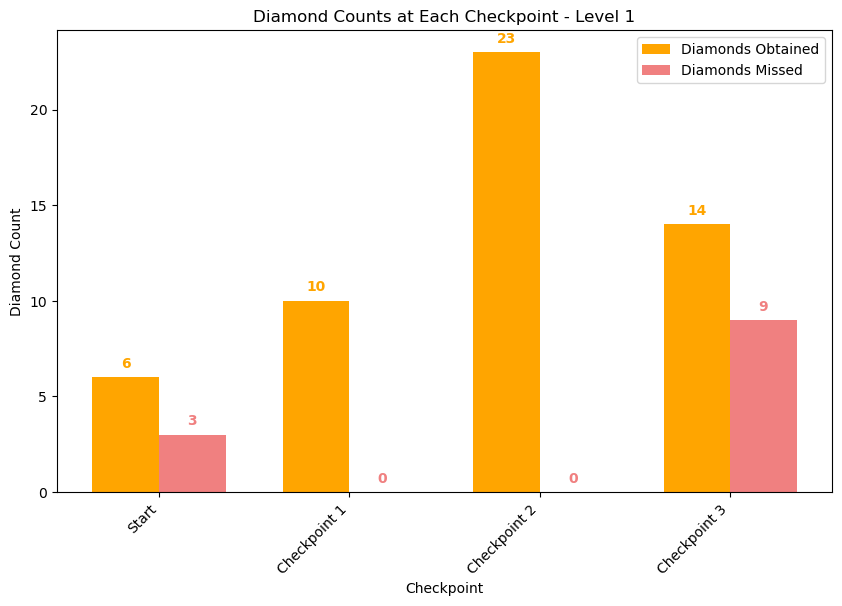

In [ ]:
total_diamonds = {
    "Level 1": {
        "Start": 9,
        "Checkpoint 1": 10,
        "Checkpoint 2": 23,
        "Checkpoint 3": 23,
    },
    "Level 2": {
        "Start": 24, # start to c1
        "Checkpoint 1": 6, # c1 to c2
        "Checkpoint 2": 5, # c2 to c3
        "Checkpoint 3": 10, # c3 to c4
        "Checkpoint 4": 9, # c4 to c5
        "Checkpoint 5": 21, # c5 to c6
        "Checkpoint 6": 5, # c6 to c7
        "Checkpoint 7": 12, # c7 to c8
        "Checkpoint 8": 14, # c8 to c9 
    }
}

def plot_diamonds(data_diamonds, level):
    checkpoints = list(data_diamonds.keys())
    data_diamonds["Checkpoint 4"] = 4 if "Checkpoint 7" in data_diamonds else 9

    level_total_diamonds = total_diamonds.get(level, {})
    
    obtained_counts = [data_diamonds.get(checkpoint, 0) for checkpoint in checkpoints]
    
    missed_counts = [level_total_diamonds.get(checkpoint, 0) - obtained for checkpoint, obtained in zip(checkpoints, obtained_counts)]
    
    bar_width = 0.35
    x = np.arange(len(checkpoints))
   
    fig = plt.figure(figsize=(max(10, len(checkpoints)), 6)) 
    plt.bar(x - bar_width / 2, obtained_counts, bar_width, label='Diamonds Obtained', color='orange')
    plt.bar(x + bar_width / 2, missed_counts, bar_width, label='Diamonds Missed', color='lightcoral')

    for i, count in enumerate(obtained_counts):
        plt.text(x[i] - bar_width / 2, count + 0.5, str(count), ha='center', color='orange', fontweight='bold')

    for i, count in enumerate(missed_counts):
        plt.text(x[i] + bar_width / 2, count + 0.5, str(count), ha='center', color='lightcoral', fontweight='bold')
    
    plt.title(f"Diamond Counts at Each Checkpoint - {level}")
    plt.xlabel("Checkpoint")
    plt.ylabel("Diamond Count")

    plt.xticks(ticks=x, labels=checkpoints, rotation=45, ha='right')
    plt.legend()
    
    return fig

data_diamonds_level2 = {"Start": 6, "Checkpoint 1": 10, "Checkpoint 2": 23, "Checkpoint 3": 14}
fig_diamonds_level2 = plot_diamonds(data_diamonds_level2, "Level 2")
plt.show()
